### Ładowane danych

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import numpy as np


url = "https://raw.githubusercontent.com/dprzek/sgh_python/main/10-Homework_3/insurance.csv"
df = pd.read_csv(url)

### Podstawowe informacje o zbiorze danych

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Mamy 1338 rekordów, zbiór danych nie posiada brakujących wartosci. Mamy 4 zmienne ilościowe oraz 3 zmienne jakościowe.
Naszą zmienną zależną będzie zmienna "charges"


In [17]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Tak się prezentuje 10 pierwszych rekordów

In [18]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


A tak 10 ostatnich rekordów

In [19]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Statyski opisowa dla całego zbioru

In [20]:
sex_table = pd.crosstab(index=df['sex'], columns='count')


region_table = pd.crosstab(index=df['region'], columns='count')


smoker_table = pd.crosstab(index=df['smoker'], columns='count')


print("Tabela dla zmiennej 'sex':")
print(sex_table)

print("\nTabela dla zmiennej 'region':")
print(region_table)

print("\nTabela dla zmiennej 'smoker':")
print(smoker_table)

Tabela dla zmiennej 'sex':
col_0   count
sex          
female    662
male      676

Tabela dla zmiennej 'region':
col_0      count
region          
northeast    324
northwest    325
southeast    364
southwest    325

Tabela dla zmiennej 'smoker':
col_0   count
smoker       
no       1064
yes       274


Dla każdej zmiennej kategorycznej ilość wystąpień każdej kategorii

In [21]:
region_sex_smoker_cross = pd.crosstab(index=[df['region'], df['sex']], columns=df['smoker'])


print("\nTabela krzyżowa dla 'region', 'sex' i 'smoker':")
print(region_sex_smoker_cross)


Tabela krzyżowa dla 'region', 'sex' i 'smoker':
smoker             no  yes
region    sex             
northeast female  132   29
          male    125   38
northwest female  135   29
          male    132   29
southeast female  139   36
          male    134   55
southwest female  141   21
          male    126   37


Ilość wystąpień, gdy "złączymy" wszystkie 3 zmienne jakościowe

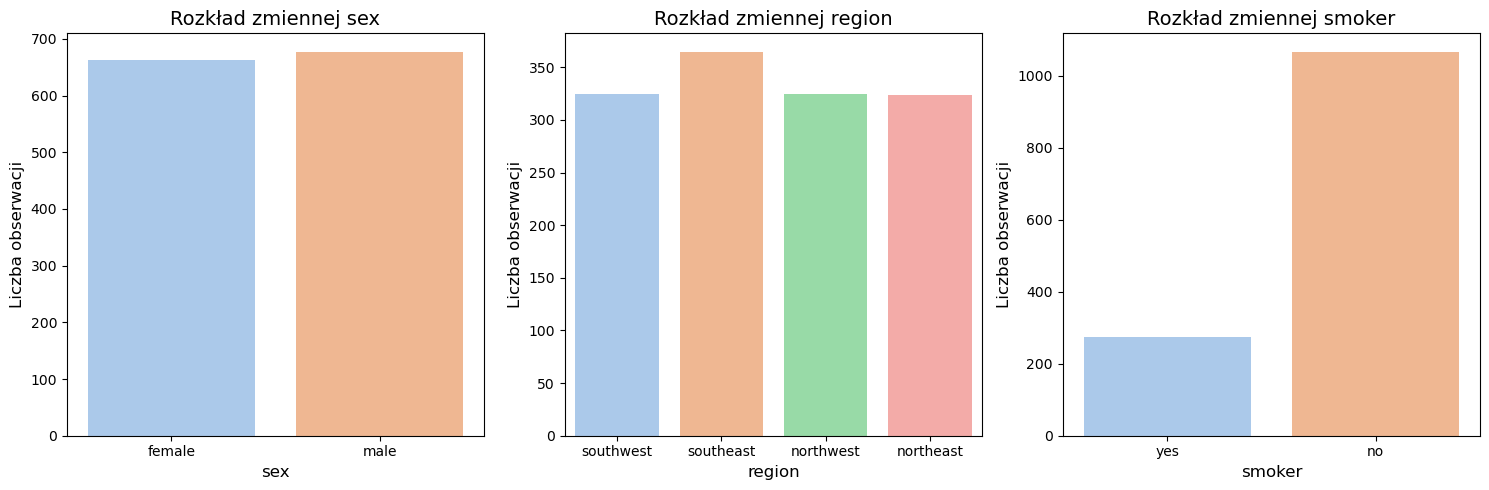

In [22]:
categorical_columns = ['sex', 'region', 'smoker']

plt.figure(figsize=(15, 5))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f'Rozkład zmiennej {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Liczba obserwacji', fontsize=12)

plt.tight_layout()
plt.show()

Zmienne jakościowe na wykresie

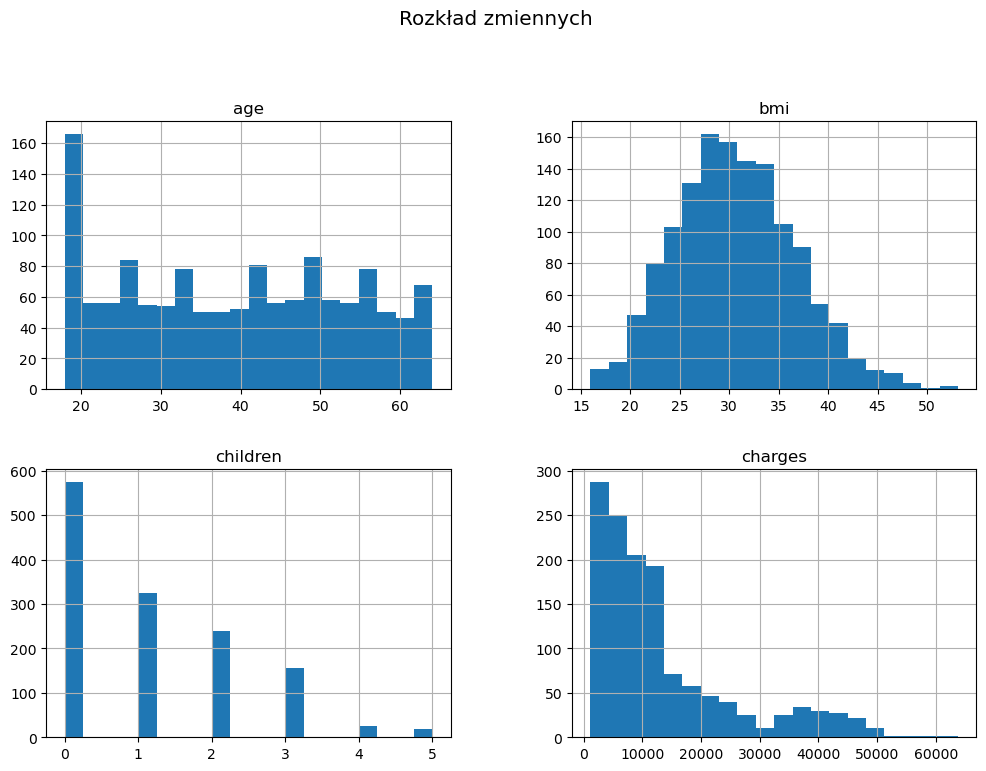

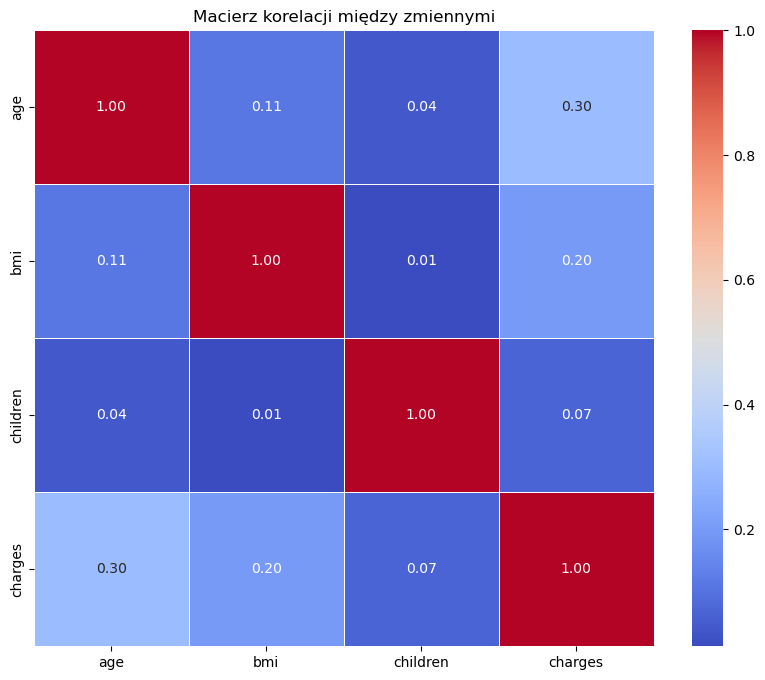

In [23]:
selected_columns = ['age', 'bmi', 'children', 'charges']
# Wykresy rozkładu (histogramy)
df[selected_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Rozkład zmiennych', x=0.5, y=1.02, ha='center', fontsize='x-large')
plt.show()

# Wykres korelacji między zmiennymi
correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Macierz korelacji między zmiennymi')
plt.show()

Spośród zmiennych ilościowych najsilniej koreluje ze zmienną zależną zmienna "age": 0,30

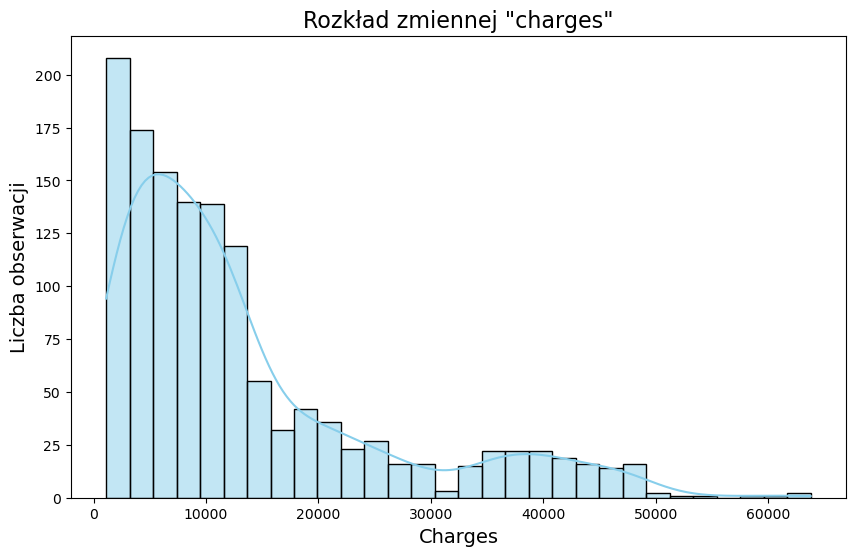

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True, color='skyblue')
plt.title('Rozkład zmiennej "charges"', fontsize=16)
plt.xlabel('Charges', fontsize=14)
plt.ylabel('Liczba obserwacji', fontsize=14)
plt.show()

### Przygotowanie danych

In [25]:
df_encoded = pd.get_dummies(df, columns=['sex', 'region', 'smoker'], drop_first=True)

X = df_encoded.drop('charges', axis=1)
X = sm.add_constant(X)  
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Budowa modelu za pomocą statmodels

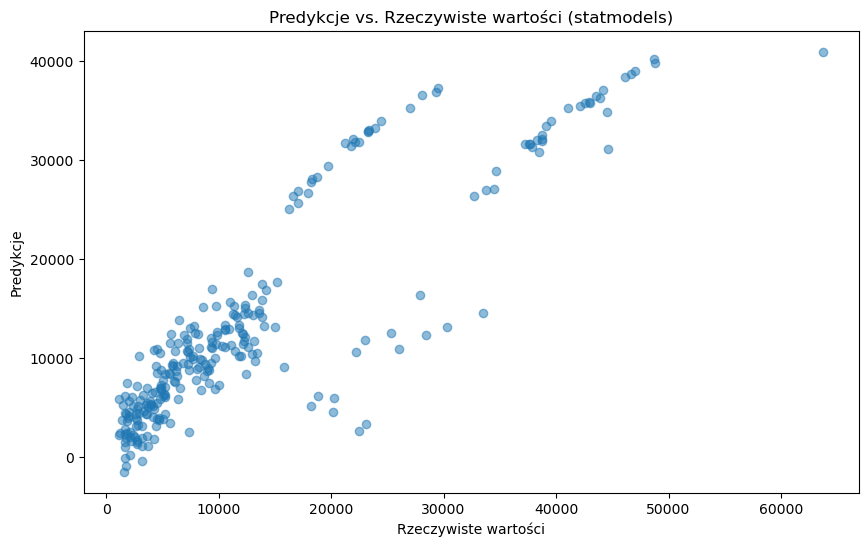

MAE (statmodels): 4181.194473753652
RMSE (statmodels): 5796.284659276274
R^2 (statmodels): 0.7835929767120722

Równanie modelu:
Y = -11931.22 + 256.98 * age + 337.09 * bmi + 425.28 * children + -18.59 * sex_male + -370.68 * region_northwest + -657.86 * region_southeast + -809.80 * region_southwest + 23651.13 * smoker_yes


In [26]:
model = sm.OLS(y_train, X_train).fit()

y_pred_statmodels = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_statmodels, alpha=0.5)
plt.title('Predykcje vs. Rzeczywiste wartości (statmodels)')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Predykcje')
plt.show()

mae_statmodels = mean_absolute_error(y_test, y_pred_statmodels)
rmse_statmodels = np.sqrt(mean_squared_error(y_test, y_pred_statmodels))
r2_statmodels = r2_score(y_test, y_pred_statmodels)

print(f'MAE (statmodels): {mae_statmodels}')
print(f'RMSE (statmodels): {rmse_statmodels}')
print(f'R^2 (statmodels): {r2_statmodels}')

coefficients = model.params
equation = f'Y = {coefficients[0]:.2f}'
for i in range(1, len(coefficients)):
    equation += f' + {coefficients[i]:.2f} * {X.columns[i]}'

print("\nRównanie modelu:")
print(equation)

### Budowa modelu za pomocą sklearn

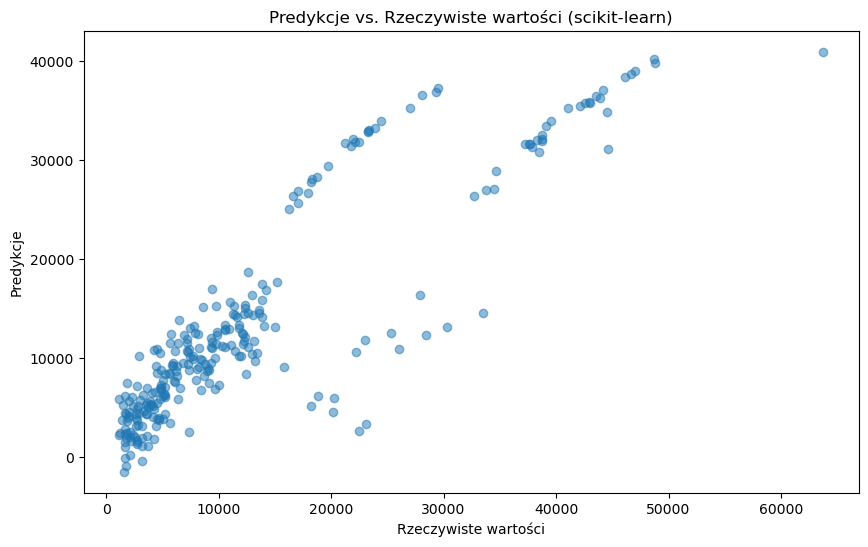

MAE (scikit-learn): 4181.194473753652
RMSE (scikit-learn): 5796.284659276274
R^2 (scikit-learn): 0.7835929767120722

Równanie modelu (scikit-learn):
Y = -11931.22 + 0.00 * const + 256.98 * age + 337.09 * bmi + 425.28 * children + -18.59 * sex_male + -370.68 * region_northwest + -657.86 * region_southeast + -809.80 * region_southwest + 23651.13 * smoker_yes


In [27]:
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

y_pred_sklearn = model_sklearn.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sklearn, alpha=0.5)
plt.title('Predykcje vs. Rzeczywiste wartości (scikit-learn)')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Predykcje')
plt.show()

mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f'MAE (scikit-learn): {mae_sklearn}')
print(f'RMSE (scikit-learn): {rmse_sklearn}')
print(f'R^2 (scikit-learn): {r2_sklearn}')

coefficients = model_sklearn.coef_
intercept = model_sklearn.intercept_

equation = f'Y = {intercept:.2f}'
for i in range(len(coefficients)):
    equation += f' + {coefficients[i]:.2f} * {X.columns[i]}'

print("\nRównanie modelu (scikit-learn):")
print(equation)

### Podsumowanie 

In [28]:
print(f"Oba modele zwróciły to samo równanie modelu {equation}."
      f" MAE wynoszącę {mae_sklearn} oznacza, że bezwzględna różnica między prognozowaną wartością a rzeczywistą wartością wynosi {mae_sklearn} jednostek."
      f" RMSE (Root Mean Squared Error wynoszącę {rmse_sklearn}, czyli tyle wynosił pierwiastek ze średniego błędu kwadratowego."
      f"Zarówno MAE oraz RMSE chcemy, żeby było jak najniższe. "
      f"Wartość R^2 wynosząca około 0.78 oznacza, że model jest w stanie wyjaśnić około 78% zmienności danych, co wskazuje na dość dobrą zdolność modelu do dopasowywania się do rzeczywistych danych.")

Oba modele zwróciły to samo równanie modelu Y = -11931.22 + 0.00 * const + 256.98 * age + 337.09 * bmi + 425.28 * children + -18.59 * sex_male + -370.68 * region_northwest + -657.86 * region_southeast + -809.80 * region_southwest + 23651.13 * smoker_yes. MAE wynoszącę 4181.194473753652 oznacza, że bezwzględna różnica między prognozowaną wartością a rzeczywistą wartością wynosi 4181.194473753652 jednostek. RMSE (Root Mean Squared Error wynoszącę 5796.284659276274, czyli tyle wynosił pierwiastek ze średniego błędu kwadratowego.Zarówno MAE oraz RMSE chcemy, żeby było jak najniższe. Wartość R^2 wynosząca około 0.78 oznacza, że model jest w stanie wyjaśnić około 78% zmienności danych, co wskazuje na dość dobrą zdolność modelu do dopasowywania się do rzeczywistych danych.
